# Workflow examples with R2BEAT 
# Scenario 1
Only a sampling frame containing the units of the population 
of reference is available, no previous round of the sampling survey to be 
planned

In [1]:
# Install last version of R2BEAT and ReGenesees
#install.packages("devtools")
#devtools::install_github("DiegoZardetto/ReGenesees",dependencies = FALSE)
#devtools::install_github("barcaroli/R2BEAT",dependencies=FALSE)
library("R2BEAT")

Caricamento del pacchetto richiesto: plyr

Caricamento del pacchetto richiesto: devtools

Caricamento del pacchetto richiesto: usethis

Caricamento del pacchetto richiesto: sampling



In [3]:
packageVersion("R2BEAT")

[1] '1.0.4'

In [4]:
## Sampling frame
load("pop.RData")
str(pop)

'data.frame':	2258507 obs. of  13 variables:
 $ region       : Factor w/ 3 levels "north","center",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ province     : Factor w/ 6 levels "north_1","north_2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ municipality : num  1 1 1 1 1 1 1 1 1 1 ...
 $ id_hh        : Factor w/ 963018 levels "H1","H10","H100",..: 1 1 1 2 3 3 3 3 1114 1114 ...
 $ id_ind       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ stratum      : Factor w/ 24 levels "1000","2000",..: 12 12 12 12 12 12 12 12 12 12 ...
 $ stratum_label: chr  "north_1_6" "north_1_6" "north_1_6" "north_1_6" ...
 $ sex          : int  1 2 1 2 1 1 2 2 1 1 ...
 $ cl_age       : Factor w/ 8 levels "(0,14]","(14,24]",..: 3 7 8 5 4 6 6 4 4 1 ...
 $ active       : num  1 1 0 1 1 1 1 1 1 0 ...
 $ income_hh    : num  30488 30488 30488 21756 29871 ...
 $ unemployed   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ inactive     : num  0 0 1 0 0 0 0 0 0 1 ...


## Precision constraints

In [5]:

cv <- as.data.frame(list(DOM=c("DOM1","DOM2"),
                         CV1=c(0.02,0.03),
                         CV2=c(0.03,0.06),
                         CV3=c(0.03,0.06),
                         CV4=c(0.05,0.08)))
cv

DOM,CV1,CV2,CV3,CV4
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
DOM1,0.02,0.03,0.03,0.05
DOM2,0.03,0.06,0.06,0.08


## Sensitivity analysis


Calculating strata...
Computations are being done on population data

Number of strata:  24
... of which with only one unit:  0
Calculating rho in strata...
Stratum  1000
Stratum  2000
Stratum  3000
Stratum  4000
Stratum  5000
Stratum  6000
Stratum  7000
Stratum  8000
Stratum  9000
Stratum  10000
Stratum  11000
Stratum  12000
Stratum  13000
Stratum  14000
Stratum  15000
Stratum  16000
Stratum  17000
Stratum  18000
Stratum  19000
Stratum  20000
Stratum  21000
Stratum  22000
Stratum  23000
Stratum  24000
 1  iterations PSU_SR PSU NSR PSU Total  SSU
1          0      0       0         0 7836
2          1     50     122       172 8072
3          2     51     126       177 8071

 2  iterations PSU_SR PSU NSR PSU Total  SSU
1          0      0       0         0 7836
2          1     31     120       151 8130
3          2     34     120       154 8127

 3  iterations PSU_SR PSU NSR PSU Total  SSU
1          0      0       0         0 7836
2          1     27     112       139 8185
3         

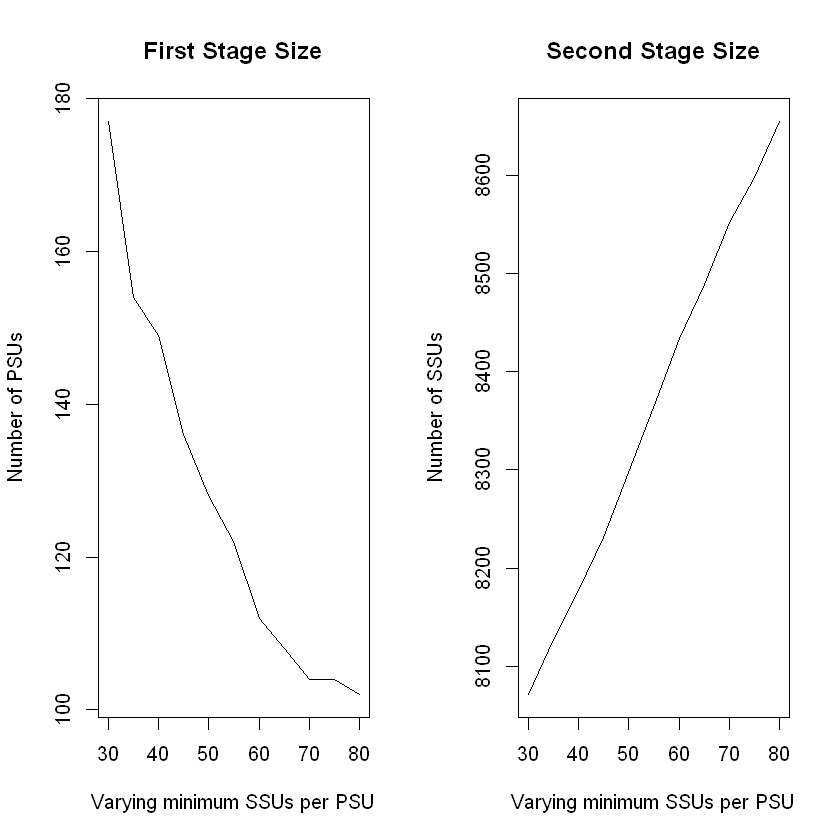

In [6]:
sens_min_SSU <- sensitivity_min_SSU (
             samp_frame=pop,
             errors=cv,
             id_PSU="municipality",
             id_SSU="id_ind",
             strata_var="stratum",
             target_vars=c("income_hh","active","inactive","unemployed"),
             deff_var="stratum",
             domain_var="region",
             delta=1,
             deff_sugg=1,
             min=30,
             max=80,
             plot=TRUE)

## Preparation of inputs for allocation steps

In [8]:
## Preparation of inputs for allocation steps
samp_frame <- pop
samp_frame$one <- 1
id_PSU <- "municipality"  
id_SSU <- "id_ind"        
strata_var <- "stratum"   
target_vars <- c("income_hh","active","inactive","unemployed")   
deff_var <- "stratum"     
domain_var <- "region"  
delta =  1       # households = survey units
minimum <- 50    # minimum number of SSUs to be interviewed in each selected PSU
deff_sugg <- 1.5 # suggestion for the deff value
 
inp1 <- prepareInputToAllocation1(samp_frame,
                                id_PSU,
                                id_SSU,
                                strata_var,
                                target_vars,
                                deff_var,
                                domain_var,
                                minimum,
                                delta,
                                deff_sugg)


Calculating strata...
Computations are being done on population data

Number of strata:  24
... of which with only one unit:  0
Calculating rho in strata...
Stratum  1000
Stratum  2000
Stratum  3000
Stratum  4000
Stratum  5000
Stratum  6000
Stratum  7000
Stratum  8000
Stratum  9000
Stratum  10000
Stratum  11000
Stratum  12000
Stratum  13000
Stratum  14000
Stratum  15000
Stratum  16000
Stratum  17000
Stratum  18000
Stratum  19000
Stratum  20000
Stratum  21000
Stratum  22000
Stratum  23000
Stratum  24000

In [9]:
head(inp1$strata)

,N,M1,M2,M3,M4,S1,S2,S3,S4,COST,CENS,DOM1,DOM2,STRATUM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1000,197007,23959.87,0.6650322,0.2285807,0.10638708,22179.08,0.4719792,0.4199185,0.3083324,1,0,1,2,1000
2000,261456,20966.65,0.6709886,0.2297519,0.09925953,19624.65,0.4698541,0.4206732,0.2990102,1,0,1,2,2000
3000,115813,19814.73,0.6644591,0.2315975,0.10394343,14754.88,0.4721792,0.4218532,0.3051871,1,0,1,2,3000
4000,17241,18732.72,0.6273418,0.2499275,0.12273070,13462.74,0.4835122,0.4329708,0.3281278,1,0,1,2,4000
5000,101067,22070.31,0.6134445,0.2338845,0.15267100,17187.98,0.4869603,0.4232996,0.3596701,1,0,1,2,5000
6000,47218,21069.07,0.6135796,0.2348469,0.15157355,17342.74,0.4869288,0.4239031,0.3586070,1,0,1,2,6000


In [10]:
head(inp1$deff)

,STRATUM,DEFF1,DEFF2,DEFF3,DEFF4,b_nar
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000,1.5,1.5,1.5,1.5,4925.17500
12,2000,1.5,1.5,1.5,1.5,1005.60000
18,3000,1.5,1.5,1.5,1.5,222.71731
19,4000,1.5,1.5,1.5,1.5,47.89167
20,5000,1.5,1.5,1.5,1.5,2526.67500
21,6000,1.5,1.5,1.5,1.5,786.96667


In [11]:
head(inp1$effst)

,STRATUM,EFFST1,EFFST2,EFFST3,EFFST4
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000,1,1,1,1
2,2000,1,1,1,1
3,3000,1,1,1,1
4,4000,1,1,1,1
5,5000,1,1,1,1
6,6000,1,1,1,1


In [12]:
head(inp1$rho)

,STRATUM,RHO_AR1,RHO_NAR1,RHO_AR2,RHO_NAR2,RHO_AR3,RHO_NAR3,RHO_AR4,RHO_NAR4
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000,1,0.0032494875,1,0.00001260175649,1,0.0000003631192,1,0.000039120880
2,2000,1,0.0028554017,1,0.00150936389450,1,0.0007420929883,1,0.000937018761
3,3000,1,0.0069678726,1,0.00162968276279,1,0.0006469515878,1,0.002837431259
4,4000,1,0.0114552934,1,0.00578473329221,1,0.0019797687826,1,0.008962657055
5,5000,1,0.0002677333,1,0.00000001682475,1,0.0000029484212,1,0.000003404961
6,6000,1,0.0057050500,1,0.00004270905958,1,0.0000397945795,1,0.000194411580


In [13]:
head(inp1$psu_file)

,PSU_ID,STRATUM,PSU_MOS
,<dbl>,<fct>,<dbl>
1,1,12000,1546
2,2,12000,936
3,3,12000,367
4,4,10000,13032
5,5,12000,678
6,6,11000,3193


In [14]:
head(inp1$des_file)

,STRATUM,STRAT_MOS,DELTA,MINIMUM
,<fct>,<dbl>,<dbl>,<dbl>
1,1000,197007,1,50
2,2000,261456,1,50
3,3000,115813,1,50
4,4000,17241,1,50
5,5000,101067,1,50
6,6000,47218,1,50


## Allocation

In [15]:
inp1$desfile$MINIMUM <- 50
alloc1 <- beat.2st(stratif = inp1$strata, 
                  errors = cv, 
                  des_file = inp1$des_file, 
                  psu_file = inp1$psu_file, 
                  rho = inp1$rho, 
                  deft_start = NULL,
                  effst = inp1$effst, 
                  minPSUstrat = 2,
                  minnumstrat = 50
                  )

  iterations PSU_SR PSU NSR PSU Total  SSU
1          0      0       0         0 7887
2          1     25     100       125 8342
3          2     28     100       128 8344


## Selection of PSUs (I stage)

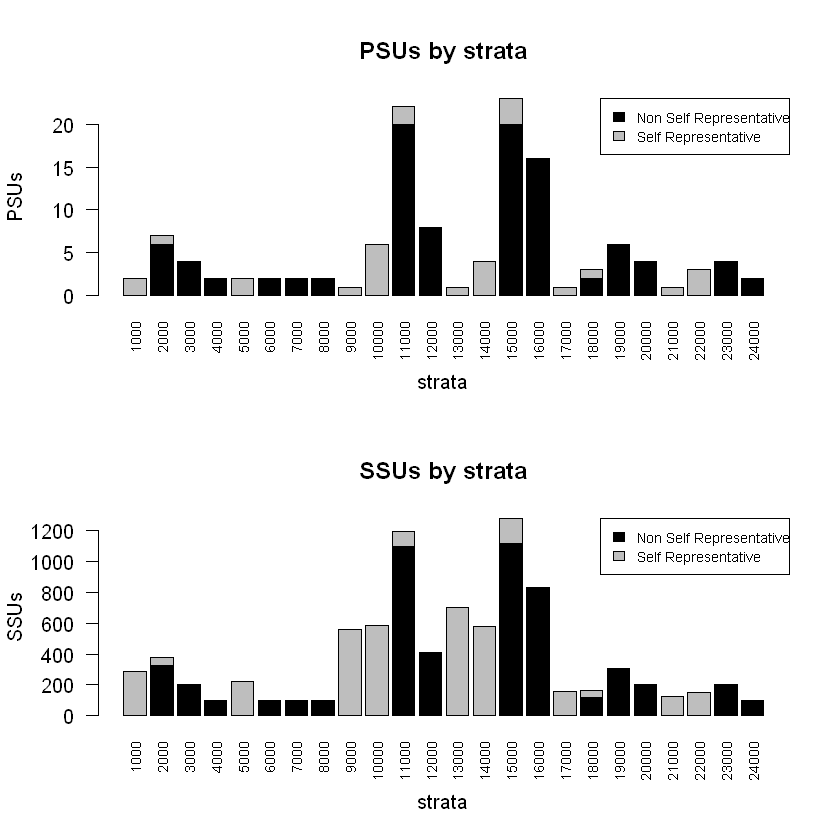

In [16]:
set.seed(1234)
sample_1st <- select_PSU(alloc1, type="ALLOC", pps=TRUE)

In [17]:
sample_1st$PSU_stats

STRATUM,PSU,PSU_SR,PSU_NSR,SSU,SSU_SR,SSU_NSR
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000,2,2,0,287,287,0
2000,7,1,6,380,52,328
3000,4,0,4,204,0,204
4000,2,0,2,100,0,100
5000,2,2,0,219,219,0
6000,2,0,2,100,0,100
7000,2,0,2,100,0,100
8000,2,0,2,100,0,100
9000,1,1,0,558,558,0


## Selection of SSUs (II stage)

In [18]:
samp <- select_SSU(df=pop,
                   PSU_code="municipality",
                   SSU_code="id_ind",
                   PSU_sampled=sample_1st$sample_PSU,
                   verbose=TRUE)


PSU =  4  *** Selected SSU =  72
PSU =  6  *** Selected SSU =  52
PSU =  8  *** Selected SSU =  558
PSU =  10  *** Selected SSU =  52
PSU =  11  *** Selected SSU =  105
PSU =  13  *** Selected SSU =  79
PSU =  15  *** Selected SSU =  56
PSU =  17  *** Selected SSU =  53
PSU =  21  *** Selected SSU =  56
PSU =  24  *** Selected SSU =  50
PSU =  25  *** Selected SSU =  50
PSU =  27  *** Selected SSU =  50
PSU =  30  *** Selected SSU =  56
PSU =  33  *** Selected SSU =  50
PSU =  35  *** Selected SSU =  52
PSU =  38  *** Selected SSU =  60
PSU =  40  *** Selected SSU =  87
PSU =  41  *** Selected SSU =  58
PSU =  42  *** Selected SSU =  50
PSU =  47  *** Selected SSU =  52
PSU =  51  *** Selected SSU =  187
PSU =  56  *** Selected SSU =  53
PSU =  61  *** Selected SSU =  60
PSU =  67  *** Selected SSU =  52
PSU =  72  *** Selected SSU =  56
PSU =  73  *** Selected SSU =  51
PSU =  77  *** Selected SSU =  58
PSU =  82  *** Selected SSU =  52
PSU =  90  *** Selected SSU =  52
PSU =  96  **

In [19]:
nrow(samp)
sum(alloc1$alloc$ALLOC[-nrow(alloc1$alloc)])

[1] 9049

[1] 8344

In [20]:
nrow(pop)
sum(samp$weight)

[1] 2258507

[1] 2258507

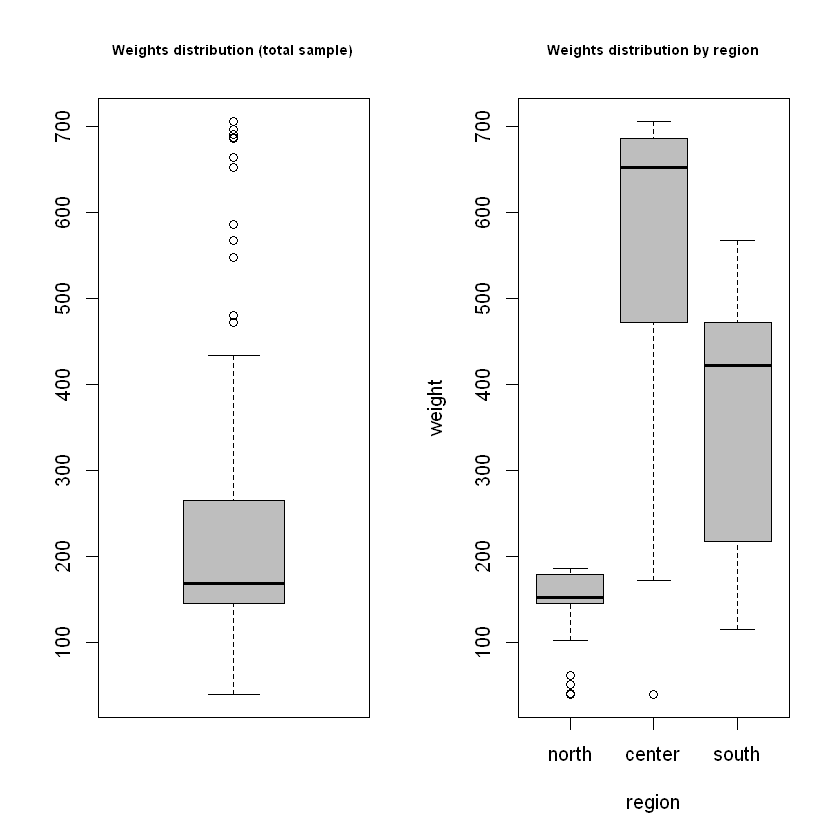

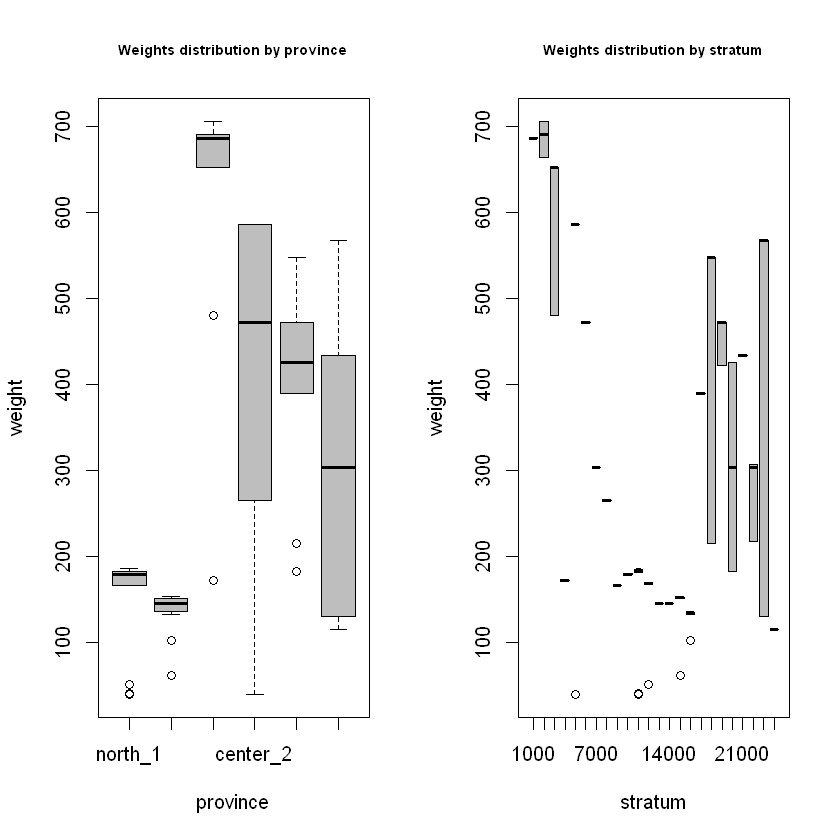

In [21]:
## Plot of weights distribution
par(mfrow=c(1, 2))
boxplot(samp$weight,col="grey")
title("Weights distribution (total sample)",cex.main=0.7)
boxplot(weight ~ region, data=samp,col="grey")
title("Weights distribution by region",cex.main=0.7)
par(mfrow=c(1, 2))
boxplot(weight ~ province, data=samp,col="grey")
title("Weights distribution by province",cex.main=0.7)
boxplot(weight ~ stratum, data=samp,col="grey")
title("Weights distribution by stratum",cex.main=0.7)

## Precision constraints compliance control (by simulation)

In [22]:
df=pop
df$one <- 1
PSU_code="municipality"
SSU_code="id_ind"
target_vars <- c("income_hh",
                 "active",
                 "inactive",
                 "unemployed")  

In [23]:
# Domain level = national
domain_var <- "one"
set.seed(1234)
eval11 <- eval_2stage(df,
                    PSU_code,
                    SSU_code,
                    domain_var,
                    target_vars,
                    sample_1st$sample_PSU,
                    nsampl=100, 
                    writeFiles=FALSE,
                    progress=TRUE) 
eval11$coeff_var

  |======================================================================| 100%


CV1,CV2,CV3,CV4,dom
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.0125,0.009,0.0266,0.0319,DOM1


  |======================================================================| 100%


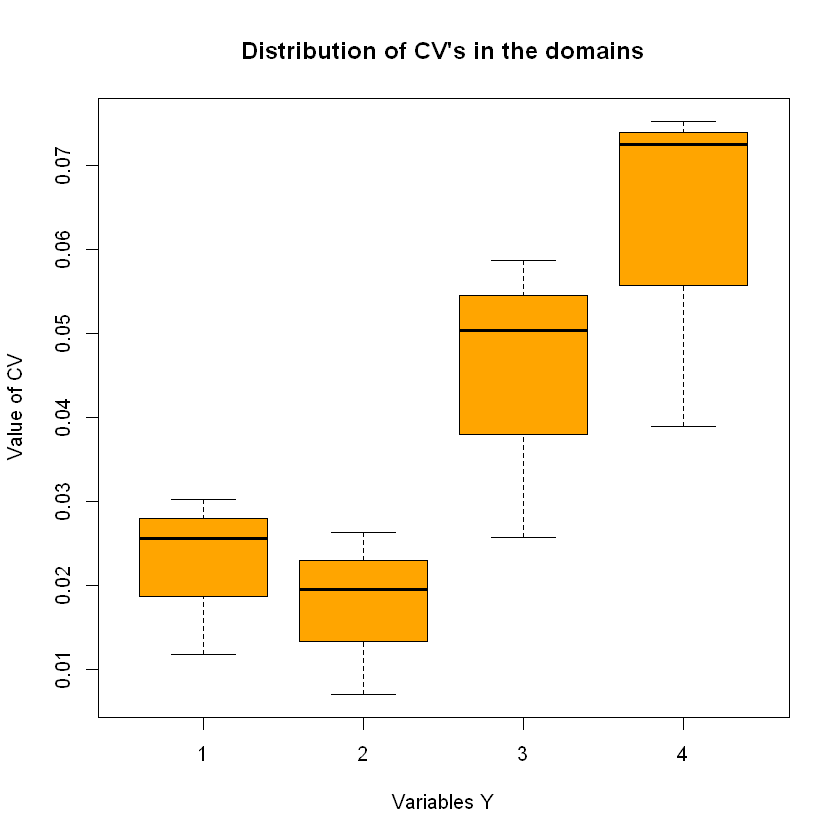

CV1,CV2,CV3,CV4,dom
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.0118,0.0070,0.0257,0.0752,DOM1
0.0303,0.0196,0.0587,0.0725,DOM2
0.0256,0.0264,0.0503,0.0390,DOM3


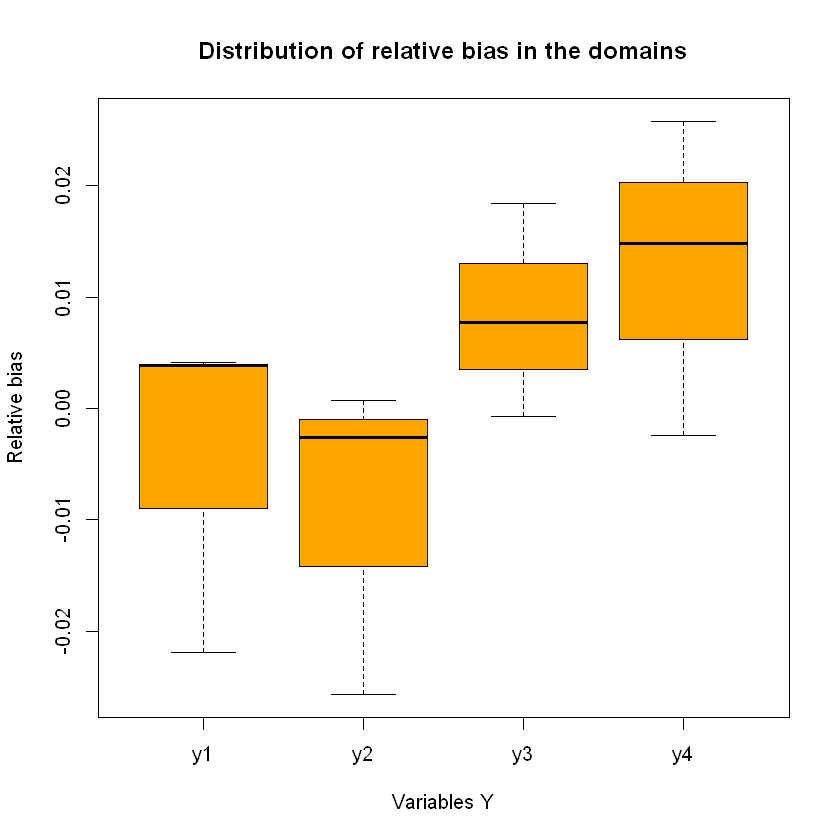

In [24]:
# Domain level = regional
domain_var <- "region"
set.seed(1234)
set.seed(1234)
eval12 <- eval_2stage(df,
                    PSU_code,
                    SSU_code,
                    domain_var,
                    target_vars,
                    sample_1st$sample_PSU,
                    nsampl=100, 
                    writeFiles=FALSE,
                    progress=TRUE) 
eval12$coeff_var

In [26]:
alloc1$sensitivity

,Type,Dom,V1,V2,V3,V4
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2,DOM1,1,1,0,1,1
6,DOM2,1,1,0,1,1184
10,DOM2,2,1,0,1,246
14,DOM2,3,203,1,27,1


In [27]:
save(samp,file="sample.RData")

# Scenario 2
One previous round of the sampling survey is available.

## Analysis of sampled data

In [28]:
library(ReGenesees)





--------------------------------------------------------

> The ReGenesees package has been successfully loaded. <

--------------------------------------------------------







Package: ReGenesees
Type: Package
Title: R Evolved Generalized Software for Sampling Estimates and Errors
        in Surveys
Description: Design-Based and Model-Assisted analysis of complex
        sampling surveys. Multistage, stratified, clustered, unequally
        weighted survey designs. Horvitz-Thompson and Calibration
        Estimators. Variance Estimation for nonlinear smooth estimators
        by Taylor-series linearization. Estimates, standard errors,
        confidence intervals and design effects for: Totals, Means,
        absolute and relative Frequency Distributions (marginal,
        conditional and joint), Ratios, Shares and Ratios of Shares,
        Multiple Regression Coefficients and Quantiles. Automated
        Linearization of Complex Analytic Estimators. Design Covariance
        and Correlation. Estimates, standard errors, confidence
        intervals and design effects for user-defined analytic
        estimators. Estimates and sampling errors for subpopulatio

In [29]:
load("sample.RData")
str(samp)

'data.frame':	9049 obs. of  20 variables:
 $ municipality : Factor w/ 128 levels "4","6","8","10",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ id_ind       : int  1580 1592 1624 1633 1705 1724 1737 1791 1807 1834 ...
 $ region       : Factor w/ 3 levels "north","center",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ province     : Factor w/ 6 levels "north_1","north_2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ id_hh        : Factor w/ 963018 levels "H1","H10","H100",..: 440225 440269 440391 440424 440702 440757 440802 440990 441057 441180 ...
 $ stratum      : Factor w/ 24 levels "1000","2000",..: 12 12 12 12 12 12 12 12 12 12 ...
 $ stratum_label: chr  "north_1_6" "north_1_6" "north_1_6" "north_1_6" ...
 $ sex          : int  2 2 1 1 2 2 2 1 1 1 ...
 $ cl_age       : Factor w/ 8 levels "(0,14]","(14,24]",..: 6 2 6 4 3 2 4 5 6 1 ...
 $ active       : num  1 1 1 1 1 1 1 1 1 0 ...
 $ income_hh    : num  25236 33867 12907 24261 139679 ...
 $ unemployed   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ inactive     : num  0 0 0 0 0 0 0 0 0 1 .

In [30]:
## Sample design description
samp$stratum_2 <- as.factor(samp$stratum_2)
sample.des <- e.svydesign(samp, 
                          ids= ~ municipality + id_hh, 
                          strata = ~ stratum_2, 
                          weights = ~ weight,
                          self.rep.str = ~ SR,
                          check.data = TRUE)


# Empty levels found in factors: id_hh
# Empty levels have been dropped!



Warning message in e.svydesign(samp, ids = ~municipality + id_hh, strata = ~stratum_2, :
"Sampling variance estimation for this design will take into account only leading contributions, i.e. PSUs in not-SR strata and SSUs in SR strata (see ?e.svydesign and ?ReGenesees.options for details)"


In [31]:
## Find and collapse lonely strata
ls <- find.lon.strata(sample.des)
sample.des <- collapse.strata(sample.des)

# No lonely PSUs found!



ERROR: Error in find.lPSU(analyze.strata(design)): No point in strata collapsing: no lonely PSUs found!


In [32]:
## Calibration with known totals
totals <- pop.template(sample.des,
             calmodel = ~ sex : cl_age, 
             partition = ~ region)
totals <- fill.template(pop, totals, mem.frac = 10)
sample.cal <- e.calibrate(sample.des, 
                          totals,
                          calmodel = ~ sex : cl_age, 
                          partition = ~ region,
                          calfun = "logit",
                          bounds = c(0.3, 2.6), 
                          aggregate.stage = 2,
                          force = FALSE)


# Coherence check between 'universe' and 'template': OK



## Preparation of inputs for allocation steps

In [33]:
samp_frame <- pop
RGdes <- sample.des
RGcal <- sample.cal
strata_vars <- c("stratum")      
target_vars <- c("income_hh",
                 "active",
                 "inactive",
                 "unemployed")   
weight_var <- "weight"
deff_vars <- "stratum"            
id_PSU <- c("municipality")      
id_SSU <- c("id_hh")             
domain_vars <- c("region") 
delta <- 1                   
minimum <- 50                

inp2 <- prepareInputToAllocation2(
        samp_frame,  # sampling frame
        RGdes,       # ReGenesees design object
        RGcal,       # ReGenesees calibrated object
        id_PSU,      # identification variable of PSUs
        id_SSU,      # identification variable of SSUs
        strata_vars, # strata variables
        target_vars, # target variables
        deff_vars,   # deff variables
        domain_vars, # domain variables
        delta,       # Average number of SSUs for each selection unit
        minimum      # Minimum number of SSUs to be selected in each PSU
      )

In [35]:
head(inp2$strata)

,stratum,STRATUM,N,M1,M2,M3,M4,S1,S2,S3,S4,COST,CENS,DOM1,DOM2
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1000,1000,199187,25855.55,0.6477995,0.2201875,0.13201306,21753.09,0.4776561,0.4143729,0.3385050,1,0,1,center
2,10000,10000,106038,29925.84,0.7587198,0.2159735,0.02530666,27411.66,0.4278599,0.4114960,0.1570549,1,0,1,north
3,11000,11000,205965,27984.95,0.7926826,0.1900771,0.01724029,22859.58,0.4053849,0.3923618,0.1301655,1,0,1,north
4,12000,12000,57672,25815.56,0.7862010,0.1855170,0.02828208,28698.40,0.4099866,0.3887164,0.1657776,1,0,1,north
5,13000,13000,102787,28770.46,0.7650873,0.2037165,0.03119621,23459.62,0.4239443,0.4027606,0.1738476,1,0,1,north
6,14000,14000,83996,24609.56,0.7503445,0.2212803,0.02837520,17776.82,0.4328136,0.4151088,0.1660423,1,0,1,north


In [36]:
head(inp2$deff)

,stratum,STRATUM,DEFF1,DEFF2,DEFF3,DEFF4,b_nar
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000,1000,1.010392,1.017108,0.997143,0.995809,143.50000
2,10000,10000,1.096035,1.001972,1.010905,1.000440,98.00000
3,11000,11000,1.375480,1.295916,1.077708,1.779027,54.45455
4,12000,12000,3.072391,1.395598,0.687271,2.198334,51.25000
5,13000,13000,1.014123,1.008403,1.010085,1.007358,704.00000
6,14000,14000,1.015870,0.993466,0.994993,1.010549,144.25000


In [37]:
head(inp2$effst)

,stratum,STRATUM,EFFST1,EFFST2,EFFST3,EFFST4
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000,1000,0.9889815,0.8658658,0.7153548,0.9739408
2,10000,10000,1.0094833,0.9043117,0.8893724,0.9929141
3,11000,11000,1.0256252,0.8155081,0.7844797,1.0176709
4,12000,12000,0.9886671,0.9182343,0.9122660,0.9535976
5,13000,13000,1.0007770,0.9269399,0.9133172,0.9984593
6,14000,14000,0.9868458,0.9415934,0.9278457,1.0213785


In [38]:
head(inp2$rho)

,STRATUM,RHO_AR1,RHO_NAR1,RHO_AR2,RHO_NAR2,RHO_AR3,RHO_NAR3,RHO_AR4,RHO_NAR4
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000,1,0.00007292632,1,0.00012005614,1,-0.00002004912,1,-0.000029410526
2,10000,1,0.00099005155,1,0.00002032990,1,0.00011242268,1,0.000004536082
3,11000,1,0.00702428571,1,0.00553584354,1,0.00145372109,1,0.014573634354
4,12000,1,0.04124161194,1,0.00787259701,1,-0.00622346269,1,0.023847442786
5,13000,1,0.00002008962,1,0.00001195306,1,0.00001434566,1,0.000010466572
6,14000,1,0.00011078534,1,-0.00004561257,1,-0.00003495288,1,0.000073640489


In [39]:
head(inp2$psu_file)

,PSU_ID,STRATUM,PSU_MOS
,<dbl>,<fct>,<dbl>
1,309,1000,50845
2,330,1000,146162
3,292,2000,24794
4,293,2000,19609
5,300,2000,13897
6,304,2000,36195


In [40]:
head(inp2$des_file)

,STRATUM,STRAT_MOS,DELTA,MINIMUM
,<fct>,<dbl>,<dbl>,<dbl>
1,1000,197007,1,50
2,2000,261456,1,50
3,3000,115813,1,50
4,4000,17241,1,50
5,5000,101067,1,50
6,6000,47218,1,50


## Allocation

In [47]:
set.seed(1234)
inp2$des_file$MINIMUM <- 50
alloc2 <- beat.2st(stratif = inp2$strata, 
                  errors = cv, 
                  des_file = inp2$des_file, 
                  psu_file = inp2$psu_file, 
                  rho = inp2$rho, 
                  deft_start = NULL, 
                  effst = inp2$effst,
                  minnumstrat = 2, 
                  minPSUstrat = 2)

  iterations PSU_SR PSU NSR PSU Total  SSU
1          0      0       0         0 8259
2          1     50      78       128 8078
3          2     24     102       126 8054
4          3     23     102       125 8068


## Selection of PSUs (I stage)

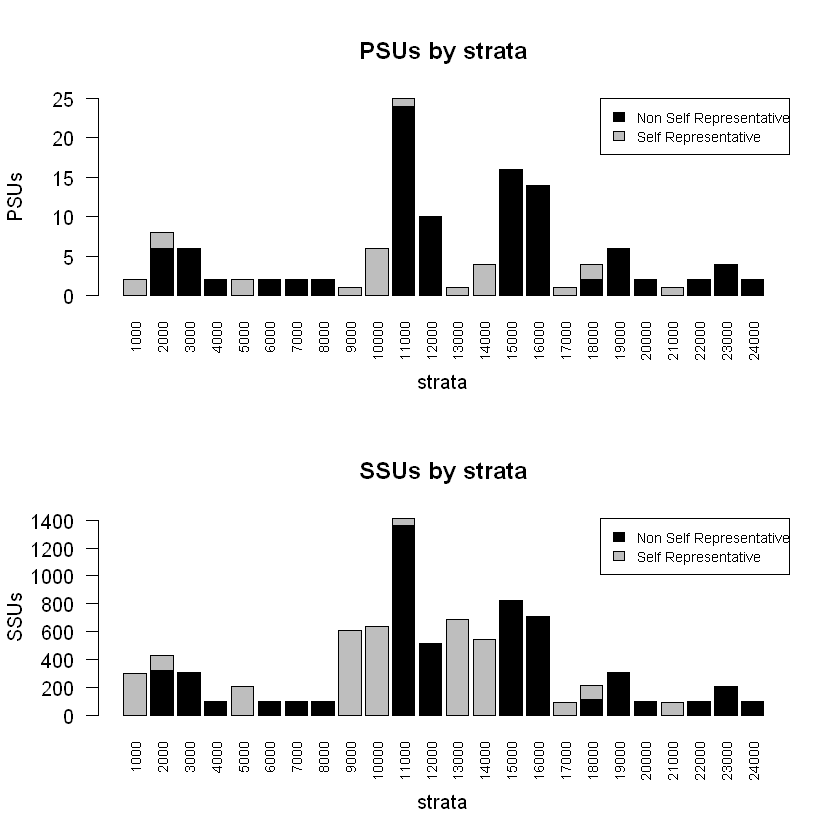

In [48]:
set.seed(1234)
sample_1st <- select_PSU(alloc2, type="ALLOC", pps=TRUE)

In [49]:
sample_1st$PSU_stats

STRATUM,PSU,PSU_SR,PSU_NSR,SSU,SSU_SR,SSU_NSR
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000,2,2,0,299,299,0
2000,8,2,6,431,111,320
3000,6,0,6,312,0,312
4000,2,0,2,100,0,100
5000,2,2,0,211,211,0
6000,2,0,2,100,0,100
7000,2,0,2,100,0,100
8000,2,0,2,100,0,100
9000,1,1,0,613,613,0


## Selection of SSUs (II stage)

In [50]:
set.seed(1234)
samp <- select_SSU(df=pop,
                   PSU_code="municipality",
                   SSU_code="id_ind",
                   PSU_sampled=sample_1st$sample_PSU,
                   verbose=TRUE)


PSU =  4  *** Selected SSU =  78
PSU =  6  *** Selected SSU =  54
PSU =  7  *** Selected SSU =  51
PSU =  8  *** Selected SSU =  613
PSU =  11  *** Selected SSU =  113
PSU =  13  *** Selected SSU =  86
PSU =  15  *** Selected SSU =  68
PSU =  16  *** Selected SSU =  58
PSU =  22  *** Selected SSU =  62
PSU =  24  *** Selected SSU =  50
PSU =  29  *** Selected SSU =  62
PSU =  30  *** Selected SSU =  58
PSU =  31  *** Selected SSU =  51
PSU =  38  *** Selected SSU =  56
PSU =  39  *** Selected SSU =  52
PSU =  40  *** Selected SSU =  94
PSU =  41  *** Selected SSU =  63
PSU =  42  *** Selected SSU =  60
PSU =  49  *** Selected SSU =  50
PSU =  51  *** Selected SSU =  202
PSU =  52  *** Selected SSU =  53
PSU =  55  *** Selected SSU =  56
PSU =  56  *** Selected SSU =  52
PSU =  61  *** Selected SSU =  56
PSU =  63  *** Selected SSU =  51
PSU =  72  *** Selected SSU =  68
PSU =  74  *** Selected SSU =  53
PSU =  75  *** Selected SSU =  50
PSU =  76  *** Selected SSU =  54
PSU =  77  ***

In [51]:
nrow(samp)
sum(alloc2$alloc$ALLOC[-nrow(alloc2$alloc)])

[1] 8811

[1] 8068

In [52]:
nrow(pop)
sum(samp$weight)

[1] 2258507

[1] 2258507

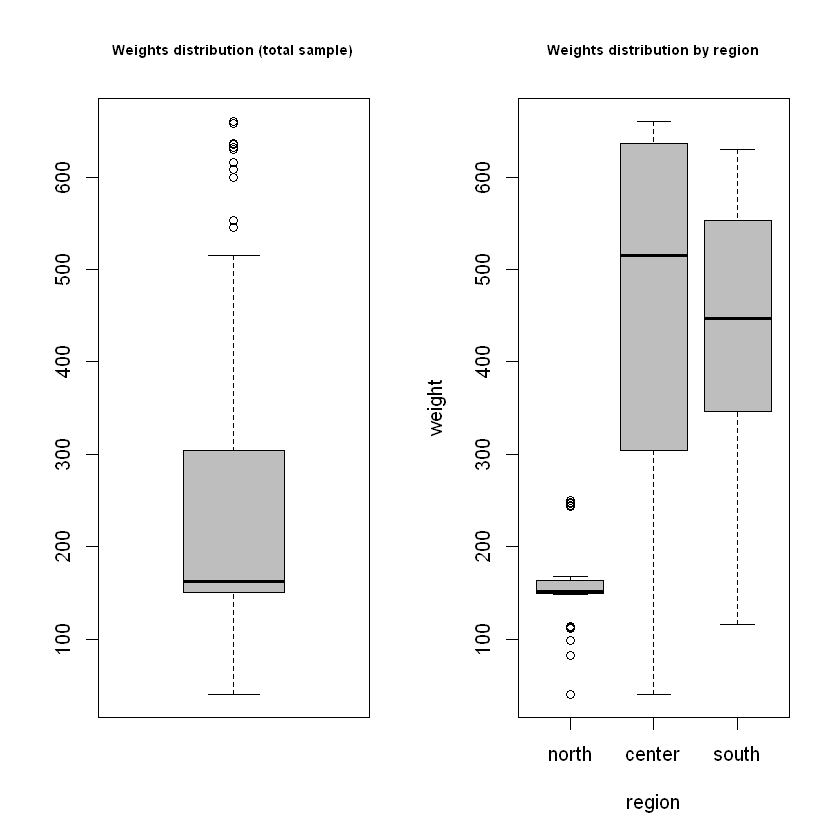

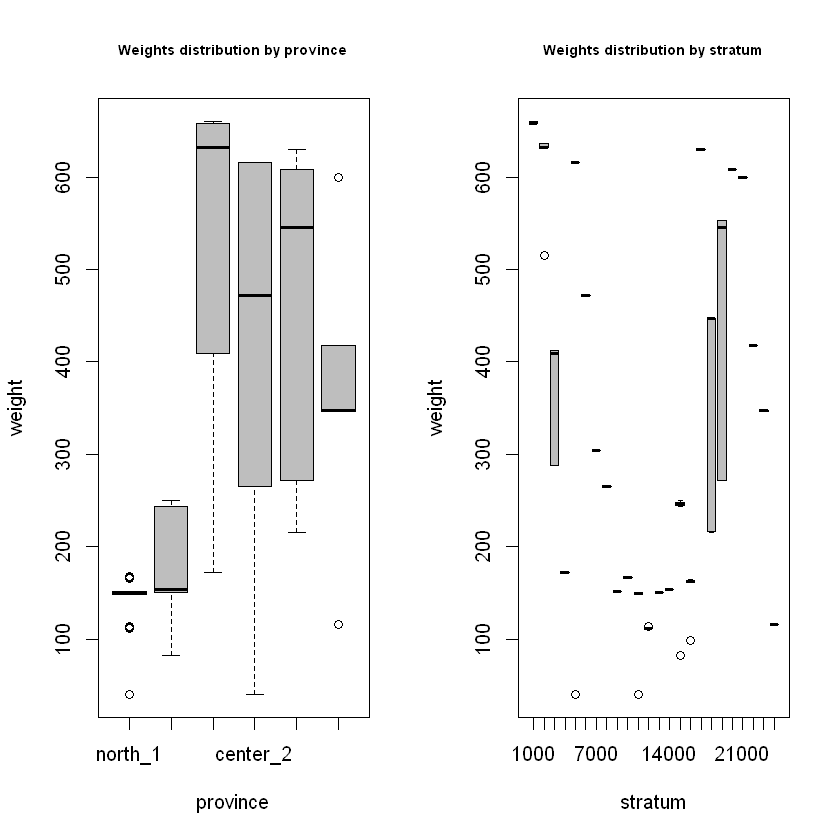

In [53]:
## Plot of weights distribution
par(mfrow=c(1, 2))
boxplot(samp$weight,col="grey")
title("Weights distribution (total sample)",cex.main=0.7)
boxplot(weight ~ region, data=samp,col="grey")
title("Weights distribution by region",cex.main=0.7)
par(mfrow=c(1, 2))
boxplot(weight ~ province, data=samp,col="grey")
title("Weights distribution by province",cex.main=0.7)
boxplot(weight ~ stratum, data=samp,col="grey")
title("Weights distribution by stratum",cex.main=0.7)

## Precision constraints compliance control (by simulation)

In [55]:
df=pop
df$one <- 1
PSU_code="municipality"
SSU_code="id_ind"
target_vars <- c("income_hh",
                 "active",
                 "inactive",
                 "unemployed")  

In [56]:
# Domain level = national
domain_var <- "one"
set.seed(1234)
eval21 <- eval_2stage(df,
                    PSU_code,
                    SSU_code,
                    domain_var,
                    target_vars,
                    PSU_sampled=sample_1st$sample_PSU,
                    nsampl=100, 
                    writeFiles=FALSE,
                    progress=TRUE) 
eval21$coeff_var

  |======================================================================| 100%


CV1,CV2,CV3,CV4,dom
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.0106,0.0085,0.0236,0.031,DOM1


  |======================================================================| 100%


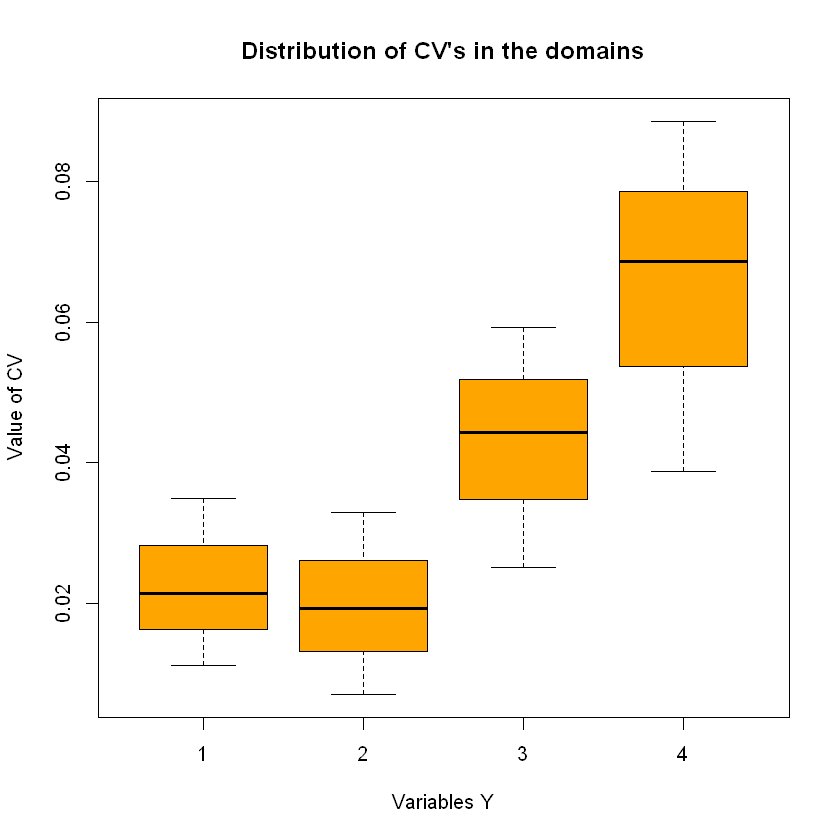

CV1,CV2,CV3,CV4,dom
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.0112,0.0070,0.0251,0.0886,DOM1
0.0214,0.0192,0.0444,0.0686,DOM2
0.0350,0.0329,0.0593,0.0388,DOM3


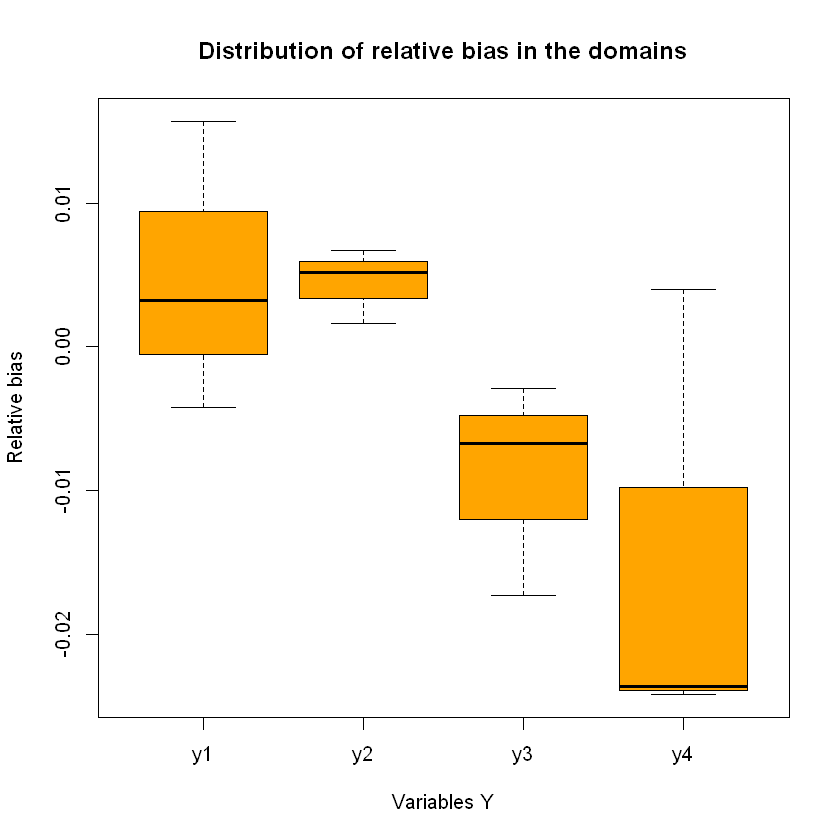

In [57]:
# Domain level = regional
domain_var <- "region"
set.seed(1234)
eval22 <- eval_2stage(df,
                    PSU_code,
                    SSU_code,
                    domain_var,
                    target_vars,
                    PSU_sampled=sample_1st$sample_PSU,
                    nsampl=100, 
                    writeFiles=FALSE,
                    progress=TRUE) 
eval22$coeff_var

In [59]:
alloc2$sensitivity

,Type,Dom,V1,V2,V3,V4
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2,DOM1,1,1,1,1,1
6,DOM2,1,1,0,1,1158
10,DOM2,2,1,1,1,257
14,DOM2,3,1,1,197,1


In [49]:
save.image(file="R2BEAT_workflows.RData")